# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "C:/Users/17703/Desktop/Shreya_Github/Python_API_Challenge/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities

lat_lngs = []
cities = []

# Create a set of random lat and lng combinations

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

## Perform API Calls

In [5]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1

Beginning Data Retrieval     
-----------------------------


In [6]:
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        
        

Processing Record 1 of Set 1 | tiksi
Processing Record 2 of Set 1 | mar del plata
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | kloulklubed
Processing Record 7 of Set 1 | isiro
Processing Record 8 of Set 1 | ouango
Processing Record 9 of Set 1 | trairi
Processing Record 10 of Set 1 | beringovskiy
Processing Record 11 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 12 of Set 1 | dickinson
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | port hardy
Processing Record 15 of Set 1 | yeniseysk
Processing Record 16 of Set 1 | provideniya
Processing Record 17 of Set 1 | hammerfest
Processing Record 18 of Set 1 | bourges
Processing Record 19 of Set 1 | severo-kurilsk
Processing Record 20 of Set 1 | cordele
Processing Record 21 of Set 1 | mataura
Processing Record 22 of Set 1 | ponta do sol
Processing Record 23 of Set 1 | 

In [7]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
city_data_pd.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_data_pd.count()

City          551
Cloudiness    551
Country       551
Date          551
Humidity      551
Lat           551
Lng           551
Max Temp      551
Wind Speed    551
dtype: int64

In [8]:
# Display the City Data Frame
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,tiksi,76,RU,1572936027,94,71.64,128.87,-12.11,2.84
1,mar del plata,21,AR,1572936027,45,-46.43,-67.52,51.17,41.56
2,ushuaia,90,AR,1572936027,80,-54.81,-68.31,39.20,10.29
3,hilo,40,US,1572936027,78,19.71,-155.08,78.80,4.70
4,kloulklubed,90,PW,1572936027,88,7.04,134.26,78.80,18.34


## Latitude vs. Temperature Plot

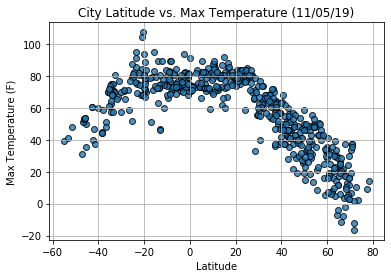

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("C:/Users/17703/Desktop/Shreya_Github/Python_API_Challenge/Fig1.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

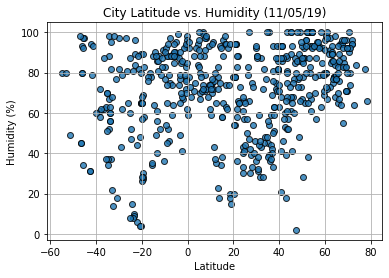

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("C:/Users/17703/Desktop/Shreya_Github/Python_API_Challenge/Fig2.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

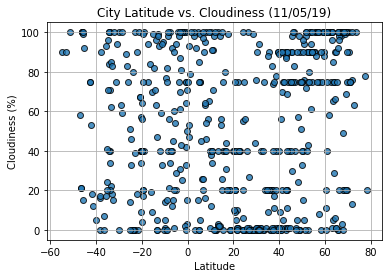

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("C:/Users/17703/Desktop/Shreya_Github/Python_API_Challenge/Fig3.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

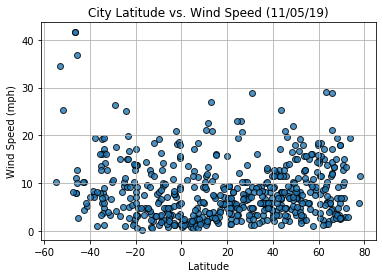

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("C:/Users/17703/Desktop/Shreya_Github/Python_API_Challenge/Fig4.png")

# Show plot
plt.show()